# UV Spectra from HST

Notebook used to visualize UV spectra of NGC 300 X-1 from the Hubble Space telescope.

In [ ]:
import matplotlib.pyplot as plt
from astropy.io import fits                                      
import numpy as np
from numpy import *
import pyspeckit
from scipy.ndimage.filters import gaussian_filter1d

In [13]:
#rebinning data

data1 = loadtxt('le6g03010_x1dsum_April27.txt')
x1 = data1[:,0]
y1 = data1[:,1]

data2 = loadtxt('le6g04010_x1dsum_April27.txt') #2nd dataset for april 27
x2 = data2[:,0]
y2 = data2[:,1]

data3 = loadtxt('le6g02010_x1dsum_April29.txt')
x3 = data3[:,0]
y3 = data3[:,1]

data4 = loadtxt('le6g01010_x1dsum_May1.txt')
x4 = data4[:,0]
y4 = data4[:,1]

smoothed_spectrum1 = gaussian_filter1d(y1, sigma=12)
smoothed_spectrum2 = gaussian_filter1d(y2, sigma=12)
smoothed_spectrum3 = gaussian_filter1d(y3, sigma=12)
smoothed_spectrum4 = gaussian_filter1d(y4, sigma=12)

In [14]:
#writing new data into a text file

file = open('rebinned_april27_1stdataset.txt',"w")
for i in range(len(y1)):
    file.write('{:.5f} {:.50f}\n'.format(x1[i],smoothed_spectrum1[i]))
    
file.close()

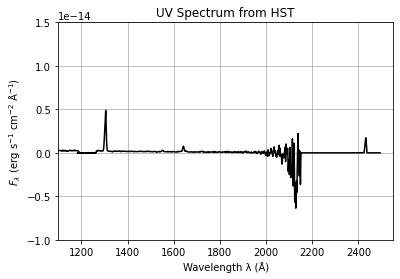

In [30]:
#testing a plot to make sure it works

data = loadtxt('rebinned_april27_1stdataset.txt')
x = data[:,0]
y = data[:,1]
plt.xlim(1100,2550)
plt.ylim(-1.0e-14,1.5e-14)


plt.plot(x, y,color='k', label = '1st Dataset for April 27')
plt.title(r'UV Spectrum from HST')
plt.xlabel('Wavelength \u03BB (\u212B)')
plt.ylabel('$F_\u03BB$ (erg s$^{-1}$ cm$^{-2}$ \u212B$^{-1}$)')
plt.grid()

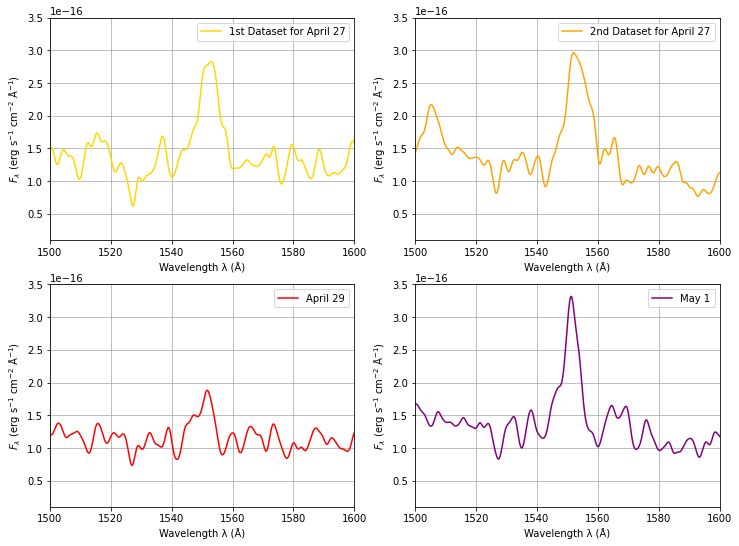

In [26]:
#plotting rebinned data

# first dataset for april 27
plt.figure(figsize=(12,9))

plt.subplot(2,2,1)
plt.plot(x1, smoothed_spectrum1, color='gold', label = '1st Dataset for April 27')
plt.xlim(1500,1600)
plt.ylim(0.01e-15, 0.035e-14)

plt.title(r'C IV $\lambda$1550 Spectral Line')
plt.xlabel('Wavelength \u03BB (\u212B)')
plt.ylabel('$F_\u03BB$ (erg s$^{-1}$ cm$^{-2}$ \u212B$^{-1}$)')
plt.legend(loc = 'upper right')
plt.grid()

# second dataset for april 27
plt.subplot(2,2,2)
plt.plot(x2, smoothed_spectrum2, color='orange', label = '2nd Dataset for April 27')
plt.xlim(1500,1600)
plt.ylim(0.01e-15, 0.035e-14)

plt.title(r'C IV $\lambda$1550 Spectral Line')
plt.xlabel('Wavelength \u03BB (\u212B)')
plt.ylabel('$F_\u03BB$ (erg s$^{-1}$ cm$^{-2}$ \u212B$^{-1}$)')
plt.legend(loc = 'upper right')
plt.grid()

# april 29
plt.subplot(2,2,3)
plt.plot(x3, smoothed_spectrum3, color='r', label = 'April 29')
plt.xlim(1500,1600)
plt.ylim(0.01e-15, 0.035e-14)

plt.title(r'C IV $\lambda$1550 Spectral Line')
plt.xlabel('Wavelength \u03BB (\u212B)')
plt.ylabel('$F_\u03BB$ (erg s$^{-1}$ cm$^{-2}$ \u212B$^{-1}$)')
plt.legend(loc = 'upper right')
plt.grid()

# may 1
plt.subplot(2,2,4)
plt.plot(x4, smoothed_spectrum4, color='purple', label = 'May 1')
plt.xlim(1500,1600)
plt.ylim(0.01e-15, 0.035e-14)

plt.title(r'C IV $\lambda$1550 Spectral Line')
plt.xlabel('Wavelength \u03BB (\u212B)')
plt.ylabel('$F_\u03BB$ (erg s$^{-1}$ cm$^{-2}$ \u212B$^{-1}$)')
plt.grid()
plt.legend(loc = 'upper right')
plt.show()

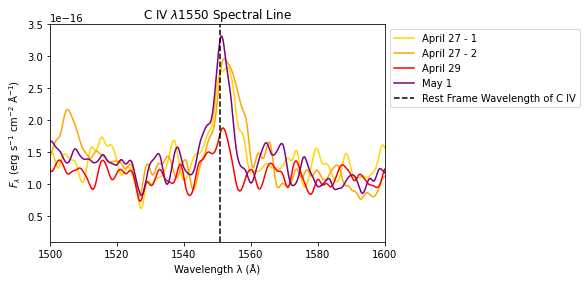

In [49]:
# all spectra on one plot

plt.plot(x1, smoothed_spectrum1,color='gold', label = 'April 27 - 1')
plt.plot(x2, smoothed_spectrum2,color='orange', label = 'April 27 - 2')
plt.plot(x3, smoothed_spectrum3,color='red', label = 'April 29')
plt.plot(x4, smoothed_spectrum4,color='purple', label = 'May 1')
plt.xlim(1500,1600)
plt.ylim(0.01e-15, 0.035e-14)
plt.axvline(x = 1550.7, linestyle = '--', color = 'k', label = 'Rest Frame Wavelength of C IV')

plt.title(r'C IV $\lambda$1550 Spectral Line')
plt.xlabel('Wavelength \u03BB (\u212B)')
plt.ylabel('$F_\u03BB$ (erg s$^{-1}$ cm$^{-2}$ \u212B$^{-1}$)')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.savefig('radialspectrum.jpg')
plt.show()